# PC Price Regression

Name: Soh Hong Yu<br/><br/>
Admin Number: P2100775<br/><br/>
Class: DAAA/FT/2A/01<br/><br/>
Module Code: ST1511 AI and Machine Learning<br/>

<hr>
<h3>References (In Harvard format):</h3>
<ol>
  <li>MOE, 2022. Personal learning device. [online] MOE. <br/>Available at: <a href="https://www.moe.gov.sg/news/parliamentary-replies/20201102-personal-learning-device">https://www.moe.gov.sg/news/parliamentary-replies/20201102-personal-learning-device</a> [Accessed 10 June 2022].</li>
</ol>


# Project Objective

Use a supervised regression machine learning model to predict the price of the PC based on the PC specification


# Background Information

Dataset is collected from a PC store. PC comes in many shapes and forms. From Gaming Laptops to Student Notebooks, PCs have many different prices. Under the National Digital Literacy Programme announced by MOE, every secondary student would have their own Personal Learning Devices (PLD). With every student requiring a PC, being able to predict prices of PCs is important to help find the perfect laptop for one.


# Initialising Libraries and Variables


In [1]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
import math
import itertools
from warnings import filterwarnings
import re
import scipy.stats as ss

# SKLEARN Libraries
# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from mlxtend.preprocessing import DenseTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import TransformedTargetRegressor

# Model Selection
from sklearn.metrics import r2_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.inspection import permutation_importance

# Models
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.dummy import DummyRegressor

# Pickle Library = Saving Models
import pickle


In [2]:
# This is used to set the seed for the RNG splitter later on.
random_state = 40


# Loading Datasets


In [3]:
df = pd.read_csv("./pc_data (regression).csv", sep=",")
df.head()


,Product ID,Brand,Type,Screen Size,Screen Specs,CPU,RAM,Hard Disk,GPU,Operating System,Weight,Price ($)
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,3568.93416
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,2394.77616
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,1531.80000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,6759.76680
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,4804.79040


# Exploratory Data Analysis

We will begin by conducting an exploratory data analysis of the data, to gain a better understanding of the characteristics of the dataset.


This is a dataset collected from a PC website, it contains 15320 data points with 12 columns.

**Product ID:** unique identifier ranging from 0 to 15319<br/>
**Brand:** Brand of the PC<br/>
**Type:** PC type, such as notebook, ultrabook<br/>
**Screen Size:** Size of the PC screen<br/>
**Screen Specs:** PC screen specs with resolution<br/>
**CPU:** CPU information of the PC<br/>
**RAM:** RAM information of the PC<br/>
**Hard Disk:** Hard Disk information of the PC<br/>
**GPU:** Graphic card of the PC<br/>
**Operating System:** Operating system, such as Windows 10, macOS<br/>
**Weight:** Weight of the PC<br/>
**Price ($):** PC price


# Data Exploration

To prevent mutation of our original data, we will make a copy of our data to perform eda on it.


In [4]:
df_eda = df.copy()


### Descriptive Statistics


In [5]:
df_eda.shape


(15320, 12)

There are 15320 rows and 12 columns in the entire data set.


In [6]:
df_eda.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15320 entries, 0 to 15319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product ID        15320 non-null  int64  
 1   Brand             15320 non-null  object 
 2   Type              15320 non-null  object 
 3   Screen Size       15320 non-null  float64
 4   Screen Specs      15320 non-null  object 
 5   CPU               15320 non-null  object 
 6   RAM               15320 non-null  object 
 7   Hard Disk         15320 non-null  object 
 8   GPU               15320 non-null  object 
 9   Operating System  15320 non-null  object 
 10  Weight            15320 non-null  object 
 11  Price ($)         15320 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 1.4+ MB


<u><b>Observations</b></u>

<ul>
  <li>The shape of dataset is (15320, 12) whereby there is 15320 observations and 12 columns. (11 Features + 1 Target Variable: "Price ($)")</li>
  <li>Most columns have a datatype of objects except Product ID, Screen Size and Price ($)</li>
  <li>There are no missing data in the dataset</li>
</ul>


### Data Information


In [7]:
descriptive_stats = df_eda.describe(include="all").T
descriptive_stats["Proportion of Most Frequent Value"] = (
    descriptive_stats["freq"] / len(df_eda) * 100
)
descriptive_stats.sort_values("Proportion of Most Frequent Value", ascending=False)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max,Proportion of Most Frequent Value
Operating System,15320,9,Windows 10,12660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.637076
Type,15320,6,Notebook,8544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.770235
RAM,15320,9,8GB,7276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.493473
Screen Specs,15320,40,Full HD 1920x1080,5944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.798956
Hard Disk,15320,39,256GB SSD,4840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.592689
Brand,15320,19,Lenovo,3532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.05483
GPU,15320,110,Intel HD Graphics 620,3320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.671018
CPU,15320,118,Intel Core i5 7200U 2.5GHz,2240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.62141
Weight,15320,179,2.2kg,1408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.190601
Product ID,15320.0,NaN,NaN,NaN,7659.5,4422.647397,0.0,3829.75,7659.5,11489.25,15319.0,NaN


<u><b>Observations</b></u>

- PC Prices are likely to be positively skewed with many outliers, as the max price of the PC is much larger than the upper quartile.


### Target variable


In [8]:
df_eda["Price ($)"].unique().shape


(9328,)

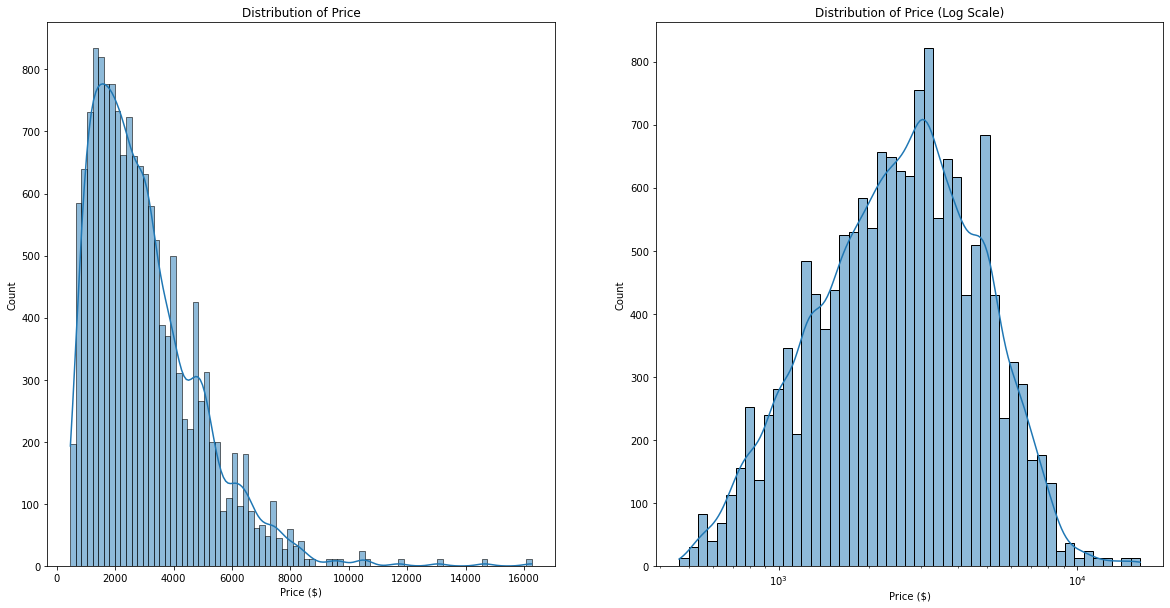

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.histplot(data=df_eda, x="Price ($)", kde=True, ax=ax[0])
ax[0].set_title("Distribution of Price")
sns.histplot(data=df_eda, x="Price ($)", kde=True, log_scale=True, ax=ax[1])
ax[1].set_title("Distribution of Price (Log Scale)")
plt.show()


We note that the distribution of the price are positively skewed and most PCs cost around \$2000 but some PCs cost more than \$16000. This suggests that the mean and standard deviation of the price might not be the best descriptor of it's distribution. We will use a log transformation to attempt to deskew the data. When plotted on a log scale, the prices appear to follow a normal distribution. This suggests that Prices of PCs follow a log normal distribution, suggesting that transformation of the target variable to accurately reflect this might improve the performance of the model.


### Pandas-Profiling

Pandas-Profiling is a convenient tool to quickly explore the datasets along with some alerts/warnings about the dataset.


In [10]:
prof = ProfileReport(df_eda, explorative=True)
# prof.to_notebook_iframe()
# prof.to_file(output_file='PC_analysis.html')


In [11]:
# Summary 1
print("Summary")
print(
    f"1. Number of UniqueID: {len(np.unique(df_eda['Product ID']))}, Length of Dataset: {len(df_eda)}"
)
print(
    f"2. Number of CPU: {len(np.unique(df_eda['CPU']))}, Types of CPU: {np.unique(df_eda['CPU'])}"
)
print(
    f"3. Number of GPU: {len(np.unique(df_eda['GPU']))}, Types of GPU: {np.unique(df_eda['GPU'])} & Types of Weight: {np.unique(df_eda['Weight'])}"
)
print(f'4. Hard Disk: {np.unique(df_eda["Hard Disk"])}')
print(f'5. Operating System: {np.unique(df_eda["Operating System"])}')
print(f'6. Screen Specs: {np.unique(df_eda["Screen Specs"])}')


Summary
1. Number of UniqueID: 15320, Length of Dataset: 15320
2. Number of CPU: 118, Types of CPU: ['AMD A10-Series 9600P 2.4GHz' 'AMD A10-Series 9620P 2.5GHz'
 'AMD A10-Series A10-9620P 2.5GHz' 'AMD A12-Series 9700P 2.5GHz'
 'AMD A12-Series 9720P 2.7GHz' 'AMD A12-Series 9720P 3.6GHz'
 'AMD A4-Series 7210 2.2GHz' 'AMD A6-Series 7310 2GHz'
 'AMD A6-Series 9220 2.5GHz' 'AMD A6-Series 9220 2.9GHz'
 'AMD A6-Series A6-9220 2.5GHz' 'AMD A8-Series 7410 2.2GHz'
 'AMD A9-Series 9410 2.9GHz' 'AMD A9-Series 9420 2.9GHz'
 'AMD A9-Series 9420 3GHz' 'AMD A9-Series A9-9420 3GHz'
 'AMD E-Series 6110 1.5GHz' 'AMD E-Series 7110 1.8GHz'
 'AMD E-Series 9000 2.2GHz' 'AMD E-Series 9000e 1.5GHz'
 'AMD E-Series E2-6110 1.5GHz' 'AMD E-Series E2-9000 2.2GHz'
 'AMD E-Series E2-9000e 1.5GHz' 'AMD FX 8800P 2.1GHz' 'AMD FX 9830P 3GHz'
 'AMD Ryzen 1600 3.2GHz' 'AMD Ryzen 1700 3GHz'
 'Intel Atom X5-Z8350 1.44GHz' 'Intel Atom Z8350 1.92GHz'
 'Intel Atom x5-Z8300 1.44GHz' 'Intel Atom x5-Z8350 1.44GHz'
 'Intel Atom x5-

<b>Summary:</b>

<ol>
  <li>Product ID is a UNIQUE KEY which means it is not a feature to describe the machine functions</li>
  <li>CPU has a high cardinality: 118 distinct values However, based on the unique values we can breakdown further into more readable data points</li>
  <li>Similarity, GPU and Weight have high cardinality which can also be broken down into brand and numbers respectively</li>
  <li>Hard Disk have combined values which can be separated during Feature Engineering</li>
  <li>Under the Operating System column, there are repeated OS like macOS and Mac OS X</li>
  <li>There are also many variables in Screen Specs which can be broken down further</li>
</ol>


### Univariate Analysis

We will begin with a univariate analysis, analysing the distribution of each variable.


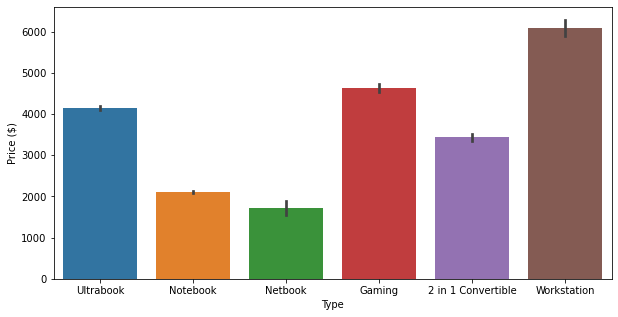

In [12]:
plt.subplots(figsize=(10, 5))
sns.barplot(data=df_eda, x="Type", y="Price ($)")
plt.show()


<u><b>Observations</b></u>

We note that on average, workstation and gaming laptops have a higher price than other types of laptops. This is expected as these types of laptop often have better specification to meet the demands of the client.


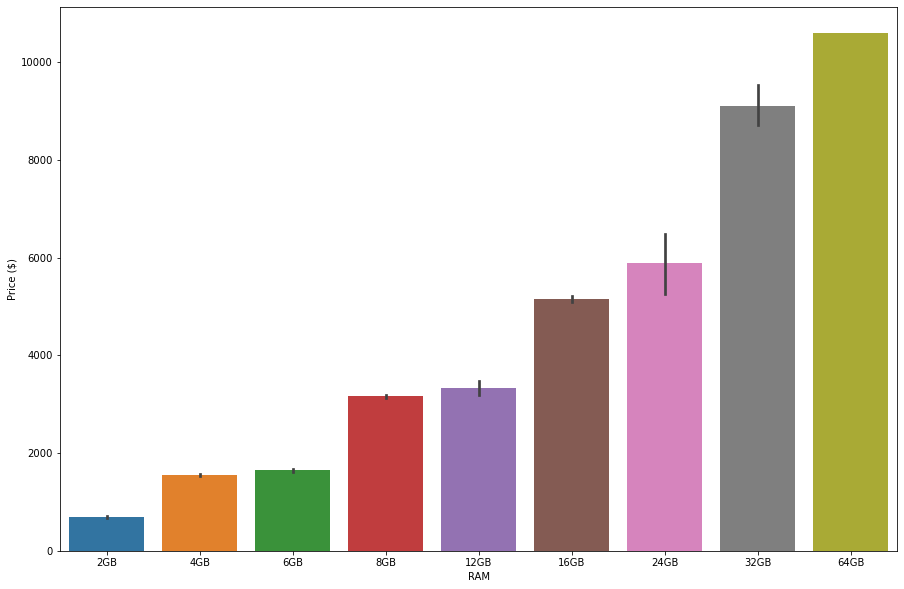

In [13]:
plt.subplots(figsize=(15, 10))
sns.barplot(
    x="RAM",
    y="Price ($)",
    data=df_eda,
    order=pd.Series(np.unique(df_eda["RAM"]))
    .apply(lambda x: x[:-2])
    .astype(int)
    .sort_values()
    .apply(lambda x: str(x) + "GB"),
)
plt.show()


<u><b>Observations</b></u>

We note that the higher the RAM the higher the price of PC


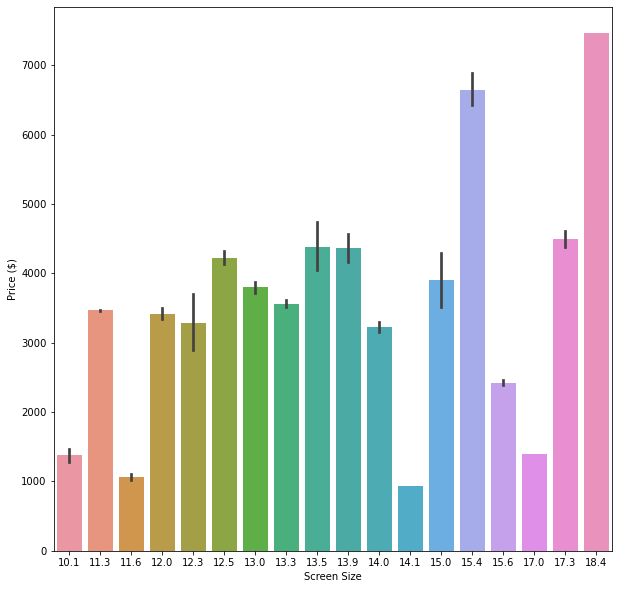

In [14]:
plt.subplots(figsize=(10, 10))
sns.barplot(x="Screen Size", y="Price ($)", data=df_eda)
plt.show()


<u><b>Observations</b></u>

We note that screen size is not an important factor in terms of predicting the PC Prices.


### Bivariate Analysis

We will analysis the relationships between the different variables


#### Cramér's V Correlations

Cramér's V is an association measure for nominal random variables. The coefficient ranges from 0 to 1, with 0 indicating independence and 1 indicating perfect association. The empirical estimators used for Cramér's V have been proved to be biased, even for large samples.

$$
\tilde{V} = \sqrt{\frac{\tilde{\varphi^2}}{\min(\tilde{k} - 1, \tilde{r} - 1)}}
$$


In [15]:
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorical-categorical association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))



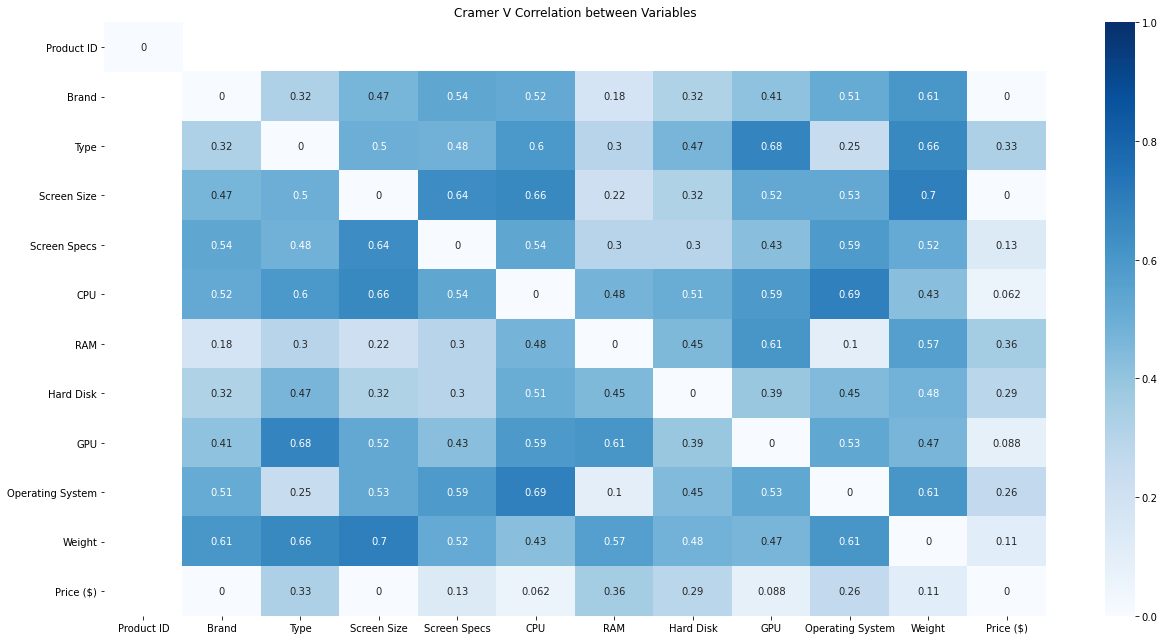

In [16]:
filterwarnings("ignore")
cols = list(df_eda.columns)
corrM = np.zeros((len(cols), len(cols)))
# calculating association level
for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_corrected_stat(pd.crosstab(df_eda[col1], df_eda[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]
# generating plot
corr = pd.DataFrame(corrM, index=cols, columns=cols)
fig, ax = plt.subplots(figsize=(18, 9), tight_layout=True)
ax = sns.heatmap(corr, annot=True, ax=ax, vmin=0, vmax=1, cmap="Blues")
ax.set_title("Cramer V Correlation between Variables")
plt.show()


<u><b>Observations</b></u>

As we have noted, ProductID is a UNIQUE Key which means there is no correlation between any other values. We can also see that the Type and RAM has a high correlation to Price > 0.3.


# Data Preparation

Before we can train a machine learning algorithm on our data, we first need to prepare our data.

## Separate Target Label and Features

We will first separate our target label from the features.


In [17]:
X, y = df.drop("Price ($)", axis=1), df["Price ($)"]


# Splitting Data points

To evaluate our final chosen models, we will leave a small independent test set to report on the final performance of our regressors. When building the hold out set, we use stratify to ensure that the distribution of classes is the same in both the independent set and the training set.


In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=random_state
)
X_training = X_train.copy()


In [19]:
X_training.shape


(12256, 11)

In [20]:
X_test.shape


(3064, 11)

# Data Preprocessing & Feature Engineering

As we have done the EDA of the data, we learn that we need to do a lot of feature engineering


#### Target Transformation

Looking at the EDA, we can see that price has a skewed distribution. This skewness can distort the regression learning algorithms performances. To counteract this problem, we will be applying LogTransformation on the target variable.

$$ X\_{Transformed} = log_e(1 + X)$$

Question: Why + 1? Answer is because $log_e(0)$ will give us undefined value as it is not a real number. However, this might not be necessary as all PC have a price > 0

Since I will be integrating sklearn TransformedTargetRegressor method, which applies log transformation for us, the following code will be used to demonstrate the effects of log transformation.


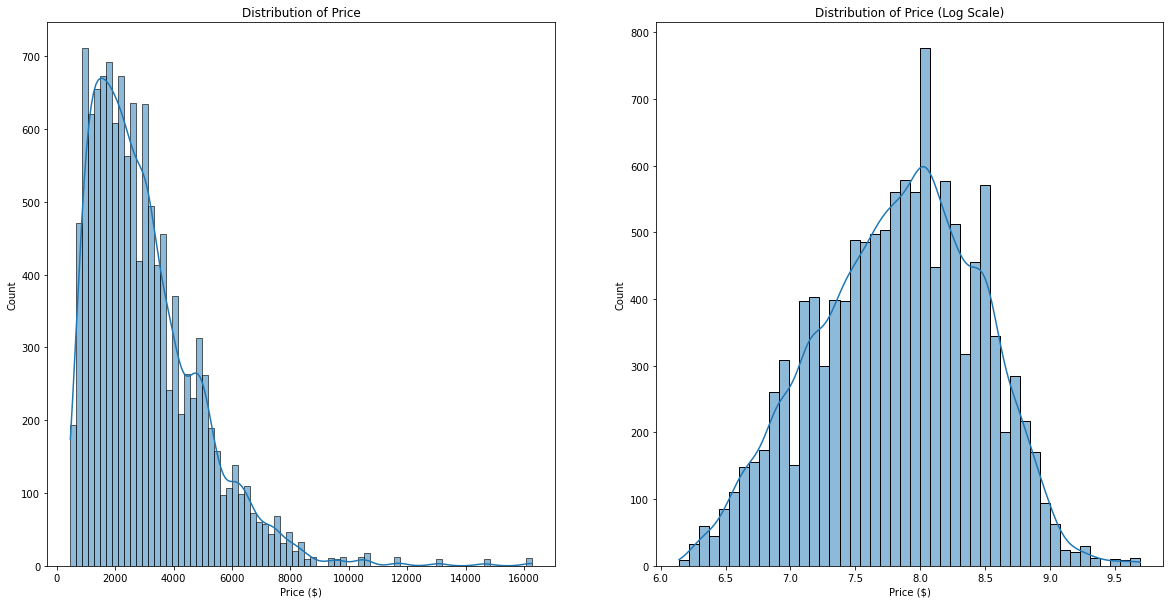

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.histplot(y_train, kde=True, ax=ax[0])
ax[0].set_title("Distribution of Price")
sns.histplot(y_train.apply(np.log1p), kde=True, ax=ax[1])
ax[1].set_title("Distribution of Price (Log Scale)")
plt.show()


### Feature Engineering

As mentioned in our EDA, we will be manipulating our data a lot of many of the categorical data can be broken down further


##### Weight & RAM

As Weight and RAM are actually numbers which are have their units behind them. we can use regex to extracted out the different units


In [22]:
X_training["RAM"] = X_training["RAM"].str.extract(r"(\d+)", expand=True).astype(int)
X_training["Weight"] = X_training["Weight"].apply(lambda x: x[:-2]).astype(float)


##### Screen Specs Extraction

As there are many types of screens like touchscreen, full hd etc. We can group them and find them using pd.str.contains to get a Boolean value. Furthermore, we can extract the screen resolution using regex.


In [23]:
X_training["isTouchscreen"] = X_training["Screen Specs"].str.contains(
    "touchscreen", regex=False, case=False
)
X_training["isFullHD"] = X_training["Screen Specs"].str.contains(
    "full hd", regex=False, case=False
)
X_training["isQuadHD"] = X_training["Screen Specs"].str.contains(
    "quad hd+", regex=False, case=False
)
X_training["is4K"] = X_training["Screen Specs"].str.contains(
    "4K", regex=False, case=False
)
X_training["isIPSPanel"] = X_training["Screen Specs"].str.contains(
    "IPS Panel", regex=False, case=False
)

X_training["Pixel Resolution"] = X_training["Screen Specs"].str.extract(r"(\d+x\d+)")



##### Pixel Density

Pixel density is a calculation that returns the number of physical pixels per inch on a screen or display of a device.
\begin{equation}
Pixel Density = \frac{\sqrt{width^2 + height^2}}{Screen size}
\end{equation}


In [24]:
X_training["Pixel Density"] = (
    pd.Series(
        pow(
            X_training["Pixel Resolution"].str.split("x", expand=True)[0].astype(int),
            2,
        )
        + pow(
            X_training["Pixel Resolution"].str.split("x", expand=True)[1].astype(int),
            2,
        )
    ).apply(lambda x: math.sqrt(x))
) / X_training["Screen Size"]



##### CPU Breakdown

As different brand has different processors like Intel i5 and Intel i7 there are different between them and therefore we cannot purely split by brand. We can also extract the CPU Hertz from the CPU column.


In [25]:
X_training["CPU Hertz"] = (
    X_training["CPU"].str.split(" ").apply(lambda x: x[-1][:-3]).astype(float)
)



In [26]:
CPU_dict = {
    "Core M": "Intel M",
    "Atom": "Intel Atom",
    "Celeron": "Intel Celeron",
    "Pentium": "Intel Pentium",
    "i3": "Intel i3",
    "i5": "Intel i5",
    "i7": "Intel i7",
    "Xeon": "Intel Xeon",
    "AMD E-Series": "AMD E",
    "AMD FX": "AMD FX",
    "AMD A4": "AMD A4",
    "AMD A6": "AMD A6",
    "AMD A8": "AMD A8",
    "AMD A9": "AMD A9",
    "AMD A10": "AMD A10",
    "AMD A12": "AMD A12",
    "AMD Ryzen": "AMD Ryzen",
    "Samsung": "Samsung",
}

for key, value in CPU_dict.items():
    X_training.loc[X_training["CPU"].str.contains(key), "CPU"] = value


##### GPU Cleaning

There are many GPU, there are 2 ways to handle it.

1. Dropping GPU Column
2. Encode with Brand
   We will encode with brand as GPU is a main factor for why gaming PCs are more expensive as they have better Graphics Cards


In [27]:
X_training["GPU"] = X_training["GPU"].str.split(" ", expand=True)[0]



##### Operating System Cleaning

As mentioned during EDA, there are duplicated os like macos and Mac OS X, we can group them by which company the OS is created from.


In [28]:
X_training["Operating System"] = (
    X_training["Operating System"]
    .str.split(" ", expand=True)[0]
    .apply(lambda x: "MAC" if x.upper().find("MACOS") != -1 else x.upper())
)



##### Hard Disk Cleaning

As there are many variation of Hard Disk like Hybrid, Flash Storage etc, we will split them correspondingly and add the Total Hard Disk Size together to get the total storage space of the Hard Disk in the PCs


In [29]:
X_training["Hard Disk"] = (
    X_training["Hard Disk"].str.replace(".0", "").str.replace("TB", "000GB")
)


X_training["Total Hard Disk Size"] = X_training["Hard Disk"].apply(
    lambda x: int(re.findall(r"\d+", x.split("+")[0])[0])
    + int(re.findall(r"\d+", x.split("+")[1])[0])
    if x.find("+") != -1
    else int(re.findall(r"\d+", x)[0])
)

X_training["Hard Disk"] = X_training["Hard Disk"].apply(
    lambda x: (
        x.replace(re.findall(fr"\d+GB", x.split("+")[0])[0], "").replace(
            re.findall(fr"\d+GB", x.split("+")[1])[0], ""
        )
    ).strip()
    if x.find("+") != -1
    else x.replace(re.findall(r"\d+GB", x)[0], "").strip()
)


#### Dropping Redundant Columns

Things to be done:

1. Dropping features that are already cleaned like Screen Specs
2. Dropping features that are unique (Product ID) as the values are unique


In [30]:
X_training.drop(["Product ID", "Screen Specs"], axis=1, inplace=True)



In [31]:
X_training


,Brand,Type,Screen Size,CPU,RAM,Hard Disk,GPU,Operating System,Weight,isTouchscreen,isFullHD,isQuadHD,is4K,isIPSPanel,Pixel Resolution,Pixel Density,CPU Hertz,Total Hard Disk Size
5689,Mediacom,Notebook,13.3,Intel Atom,4,Flash Storage,Intel,WINDOWS,1.35,False,True,False,False,True,1920x1080,165.632118,1.44,32
13359,Dell,Notebook,15.6,Intel i5,4,HDD,Intel,WINDOWS,1.93,False,False,False,False,False,1366x768,100.454670,2.60,0
12616,Lenovo,2 in 1 Convertible,10.1,Intel Atom,4,Flash Storage,Intel,WINDOWS,0.69,True,False,False,False,True,1920x1200,224.173809,1.44,64
11777,Asus,Ultrabook,15.6,Intel i5,8,SSD,Nvidia,WINDOWS,1.70,False,True,False,False,False,1920x1080,141.211998,2.50,256
3830,Apple,Ultrabook,13.3,Intel i5,8,SSD,Intel,MAC,1.37,False,False,False,False,True,2560x1600,226.983005,2.30,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11256,Apple,Ultrabook,12.0,Intel M,8,Flash Storage,Intel,MAC,0.92,False,False,False,False,True,2304x1440,226.415547,1.10,256
14501,Lenovo,Notebook,15.6,Intel i3,4,SSD,Intel,WINDOWS,2.30,False,False,False,False,False,1366x768,100.454670,2.00,128
14343,Acer,Notebook,15.6,Intel i5,6,HDD,Intel,WINDOWS,2.23,False,False,False,False,False,1366x768,100.454670,2.50,1000
14555,HP,Gaming,17.3,Intel i7,12,HDD,Nvidia,WINDOWS,2.62,False,True,False,False,False,1920x1080,127.335675,2.80,1000


### Categorical Encoding

As the our dataset still contains categorical data which is hard for some of sklearn's model to train on, we have to encode the data using one of the encoders.

1. pd.get_dummies()
2. One Hot Encoder
3. Label Encoder
4. Ordinal Encoder


In [32]:
enc = OrdinalEncoder()
cat_col = ["isTouchscreen", "isFullHD", "isQuadHD", "is4K", "isIPSPanel"]
X_training[cat_col] = enc.fit_transform(X_training[cat_col])


In [33]:
ohe = OneHotEncoder()
hot_col = [
    "Brand",
    "Type",
    "CPU",
    "Hard Disk",
    "GPU",
    "Operating System",
    "Pixel Resolution",
]

ohe.fit(X_training[hot_col])

X_training = pd.concat(
    [
        X_training.drop(hot_col, axis=1).reset_index(drop=True),
        pd.DataFrame(
            ohe.transform(X_training[hot_col]).toarray(),
            columns=ohe.get_feature_names_out(),
        ),
    ],
    axis=1,
)


### Standardization

We will be using StandardScaler as the standardize. Standard Scaler will scale the data so that the mean is 0 and standard deviation is 1 which makes it easier for the model to work.

(Note Logistic Regression and Tree Based Models are not sensitive to the magnitude of the variables and standardizing is not necessary)


In [34]:
name_col = ["Pixel Density", "Screen Size", "Weight"]
scale = StandardScaler()

X_scale_train = X_training.copy()
X_scale_train[name_col] = scale.fit_transform(X_scale_train[name_col])
X_scale_train


,Screen Size,RAM,Weight,isTouchscreen,isFullHD,isQuadHD,is4K,isIPSPanel,Pixel Density,CPU Hertz,...,Pixel Resolution_2160x1440,Pixel Resolution_2256x1504,Pixel Resolution_2304x1440,Pixel Resolution_2400x1600,Pixel Resolution_2560x1440,Pixel Resolution_2560x1600,Pixel Resolution_2736x1824,Pixel Resolution_2880x1800,Pixel Resolution_3200x1800,Pixel Resolution_3840x2160
0,-1.213151,4,-1.037351,0.0,1.0,0.0,0.0,1.0,0.443051,1.44,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.406345,4,-0.168534,0.0,0.0,0.0,0.0,0.0,-1.066239,2.60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-3.466361,4,-2.026005,1.0,0.0,0.0,0.0,1.0,1.798680,1.44,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.406345,8,-0.513065,0.0,1.0,0.0,0.0,0.0,-0.122436,2.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.213151,8,-1.007391,0.0,0.0,0.0,0.0,1.0,1.863731,2.30,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12251,-2.128518,8,-1.681474,0.0,0.0,0.0,0.0,1.0,1.850591,1.10,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12252,0.406345,4,0.385712,0.0,0.0,0.0,0.0,0.0,-1.066239,2.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12253,0.406345,6,0.280855,0.0,0.0,0.0,0.0,0.0,-1.066239,2.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12254,1.603363,12,0.865059,0.0,1.0,0.0,0.0,0.0,-0.443765,2.80,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model Selection

My plan for model selection is to run the data through some models and deem the best model based on metrics and explainability.


### Pipeline settings

We use pipelines to prevent data leakage.


In [35]:
def feature_engineering(df):
    if not "Pixel Density" in df.columns:
        df["RAM"] = df["RAM"].str.extract(r"(\d+)", expand=True).astype(int)
        df["Weight"] = df["Weight"].apply(lambda x: x[:-2]).astype(float)

        df["isTouchscreen"] = df["Screen Specs"].str.contains(
            "touchscreen", regex=False, case=False
        )
        df["isFullHD"] = df["Screen Specs"].str.contains(
            "full hd", regex=False, case=False
        )
        df["isQuadHD"] = df["Screen Specs"].str.contains(
            "quad hd+", regex=False, case=False
        )
        df["is4K"] = df["Screen Specs"].str.contains("4K", regex=False, case=False)
        df["isIPSPanel"] = df["Screen Specs"].str.contains(
            "IPS Panel", regex=False, case=False
        )

        df["Pixel Resolution"] = df["Screen Specs"].str.extract(r"(\d+x\d+)")

        df["Pixel Density"] = (
            pd.Series(
                pow(
                    df["Pixel Resolution"].str.split("x", expand=True)[0].astype(int),
                    2,
                )
                + pow(
                    df["Pixel Resolution"].str.split("x", expand=True)[1].astype(int),
                    2,
                )
            ).apply(lambda x: math.sqrt(x))
        ) / df["Screen Size"]
        df["CPU Hertz"] = (
            df["CPU"].str.split(" ").apply(lambda x: x[-1][:-3]).astype(float)
        )
        for key, value in CPU_dict.items():
            df.loc[df["CPU"].str.contains(key), "CPU"] = value
        df["GPU"] = df["GPU"].str.split(" ", expand=True)[0]
        df["Operating System"] = (
            df["Operating System"]
            .str.split(" ", expand=True)[0]
            .apply(lambda x: "MAC" if x.upper().find("MACOS") != -1 else x.upper())
        )
        df["Hard Disk"] = (
            df["Hard Disk"].str.replace(".0", "").str.replace("TB", "000GB")
        )

        df["Total Hard Disk Size"] = df["Hard Disk"].apply(
            lambda x: int(re.findall(r"\d+", x.split("+")[0])[0])
            + int(re.findall(r"\d+", x.split("+")[1])[0])
            if x.find("+") != -1
            else int(re.findall(r"\d+", x)[0])
        )

        df["Hard Disk"] = df["Hard Disk"].apply(
            lambda x: (
                x.replace(re.findall(fr"\d+GB", x.split("+")[0])[0], "").replace(
                    re.findall(fr"\d+GB", x.split("+")[1])[0], ""
                )
            ).strip()
            if x.find("+") != -1
            else x.replace(re.findall(r"\d+GB", x)[0], "").strip()
        )

        df.drop(["Product ID", "Screen Specs"], axis=1, inplace=True)
    return df


fe_df = FunctionTransformer(feature_engineering).fit_transform(X_train)
encodingScale = ColumnTransformer(
    [
        ("ohe", OneHotEncoder(), hot_col),
        ("enc", OrdinalEncoder(), cat_col),
        ("scale", StandardScaler(), name_col),
    ],
    remainder="passthrough",
)
encodingScale.fit(fe_df)
columns = pd.Series(encodingScale.get_feature_names_out()).apply(
    lambda x: x.split("__")[-1]
)

preprocessor = Pipeline(
    [
        ("feature engineering", FunctionTransformer(feature_engineering)),
        ("encoding and scaling", encodingScale),
        ("to_dense", DenseTransformer()),
    ]
)
steps = [("preprocessor", preprocessor), ("model")]



### Scoring Methods

We will be using the following metrics to evaluate the model

**R Squared (r2)**

- r2 measures how much variability in dependent variable can be explained by the model. r2 provides a measure of the proportion of the variance of a dependent variable that is explained by a regression model and defined by.

**Root Mean Squared Error**

- RMSE is the square root of the mean of the square of all of the error. We use RMSE more often as MSE values can be too big to compare easily with.

**Mean Absolute Error**

- A measure of errors between paired observations expressing the same phenomenon. It takes the sum of absolute value of error. MAE treats all errors the same.

**Mean Absolute Percentage Error**

- A measure of prediction accuracy of a forecasting method in statistics.

**Mean Squared Error**

- A measure of how close a fitted line is to data points. An absolute measure of the goodness for the fit. It takes the sum of square of prediction error which is real output minus predicted output and then divide by the number of data points.


In [36]:
# preset scoring options
scoring_methods = [
    "r2",
    "neg_root_mean_squared_error",
    "neg_mean_absolute_error",
    "neg_mean_absolute_percentage_error",
    "neg_mean_squared_error",
]


## Baseline model

A baseline model is simple and interpretable, easy to infer upon. I am going to use DummyRegressor as a baseline to benchmark against my system later on.


In [37]:
steps[-1] = (
    "model",
    TransformedTargetRegressor(
        regressor=DummyRegressor(), func=np.log1p, inverse_func=np.expm1
    ),
)
dummy = Pipeline(steps=steps)
dummy.fit(X_train, y_train)
print(f"Baseline Accuracy Score :{dummy.score(X_train, y_train)}")
scores = cross_validate(
    dummy,
    X_train,
    y_train,
    cv=10,
    scoring=scoring_methods,
    n_jobs=4,
    return_train_score=True,
)
# displaying scores
display(
    pd.DataFrame(scores)
    .append(pd.Series(pd.DataFrame(scores).mean(), name="Mean"))
    .style.apply(
        lambda x: [
            "background-color: red; color: white" if v else "" for v in x == x.min()
        ]
    )
    .apply(
        lambda x: [
            "background-color: green; color: white" if v else "" for v in x == x.max()
        ]
    )
)



Baseline Accuracy Score :-0.07325175329404243


,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_neg_mean_squared_error,train_neg_mean_squared_error
0,0.079458,0.020191,-0.049051,-0.073230,-1912.823327,-1939.620534,-1379.489599,-1398.034964,-0.606513,-0.586642,-3658893.081273,-3762127.816831
1,0.086438,0.027819,-0.053757,-0.073352,-1813.102540,-1950.980726,-1325.329029,-1404.191029,-0.593272,-0.587486,-3287340.821642,-3806325.791911
2,0.080437,0.024784,-0.100228,-0.073163,-2008.613217,-1933.997860,-1438.680784,-1392.437518,-0.573575,-0.586065,-4034527.056533,-3740347.722128
3,0.077364,0.021873,-0.067101,-0.073422,-1727.410365,-1961.007592,-1305.388288,-1406.671805,-0.565201,-0.589426,-2983946.569260,-3845550.777705
4,0.097193,0.030014,-0.074083,-0.073110,-2004.967775,-1931.887292,-1436.166259,-1392.223274,-0.599753,-0.585206,-4019895.777233,-3732188.510143
5,0.088310,0.027889,-0.096750,-0.073128,-1949.928997,-1940.267609,-1425.277178,-1393.848654,-0.567191,-0.587092,-3802223.093846,-3764638.395759
6,0.089845,0.023942,-0.078971,-0.073172,-1924.039916,-1941.546628,-1407.659031,-1395.496202,-0.583115,-0.586616,-3701929.599254,-3769603.308158
7,0.079856,0.024476,-0.074922,-0.073135,-2007.047253,-1931.762414,-1431.523129,-1392.763607,-0.596518,-0.585478,-4028238.675729,-3731706.022677
8,0.083040,0.025930,-0.064952,-0.073762,-1977.387263,-1934.675751,-1370.264080,-1399.474921,-0.582629,-0.587415,-3910060.388095,-3742970.263394
9,0.088234,0.021956,-0.080761,-0.073054,-2047.210251,-1927.591634,-1447.561390,-1391.081265,-0.599036,-0.584779,-4191069.811013,-3715609.508936


<u><b>Observations</b></u>

- The r2 score for the dummy regressor is negative which means that the model does not follow the trend of the data.
- The model is severely under-fitted as the mean absolute percentage error is around -0.58 the forecasting is bad


## Checking through the different models

We import some of the important models from the sklearn model and check which model is the best using their default parameters.

We will be using r2, root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error and mean_squared_error to score the models.


### Learning Curves

Learning Curves is a correlation between a learner's performance on a task and the number of attempts or time required to complete the task.

Before we begin, we need to make a function for us to plot the learning curve


In [38]:
def plot_learning_curve(
    model,
    X,
    y,
    scoring,
    cv=StratifiedKFold(shuffle=True, random_state=42),
    train_sizes=np.linspace(0.1, 1.0, 10),
    ax=None,
):
    try:
        model_name = type(model[-1].regressor).__name__
    except:
        try:
            model_name = type(model[-1]).__name__
        except:
            model_name = type(model).__name__
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 8))
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        model,
        X,
        y,
        cv=cv,
        n_jobs=-1,
        train_sizes=train_sizes,
        return_times=True,
        scoring=scoring,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    ax.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
    ax.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    ax.legend(loc="best")
    ax.set(
        ylim=(
            min(np.nanmin(train_scores), np.nanmin(test_scores)) - 0.01,
            max(np.nanmax(train_scores), np.nanmax(test_scores)) + 0.01,
        )
    )
    ax.set_title(f"Learning Curve of {model_name}")
    ax.set_ylabel(f"{scoring}")
    ax.set_xlabel("Train Sizes")
    return ax



### Defining models


In [39]:
models = [
    ("LinearRegression", LinearRegression()),
    ("AdaBoostRegressor", AdaBoostRegressor()),
    ("GradientBoostingRegressor", GradientBoostingRegressor()),
    ("RandomForestRegressor", RandomForestRegressor()),
    ("KNeighborsRegressor", KNeighborsRegressor()),
    ("DecisionTreeRegressor", DecisionTreeRegressor()),
    ("ExtraTreesRegressor", ExtraTreesRegressor()),
    ("Ridge", Ridge()),
    ("KernelRidge", KernelRidge()),
    ("ElasticNet", ElasticNet()),
    ("Lasso", Lasso()),
    ("HistGradientBoostingRegressor", HistGradientBoostingRegressor()),
]


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    3.6s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:   20.4s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:   36.1s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:   25.2s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:   13.3s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    4.1s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:   

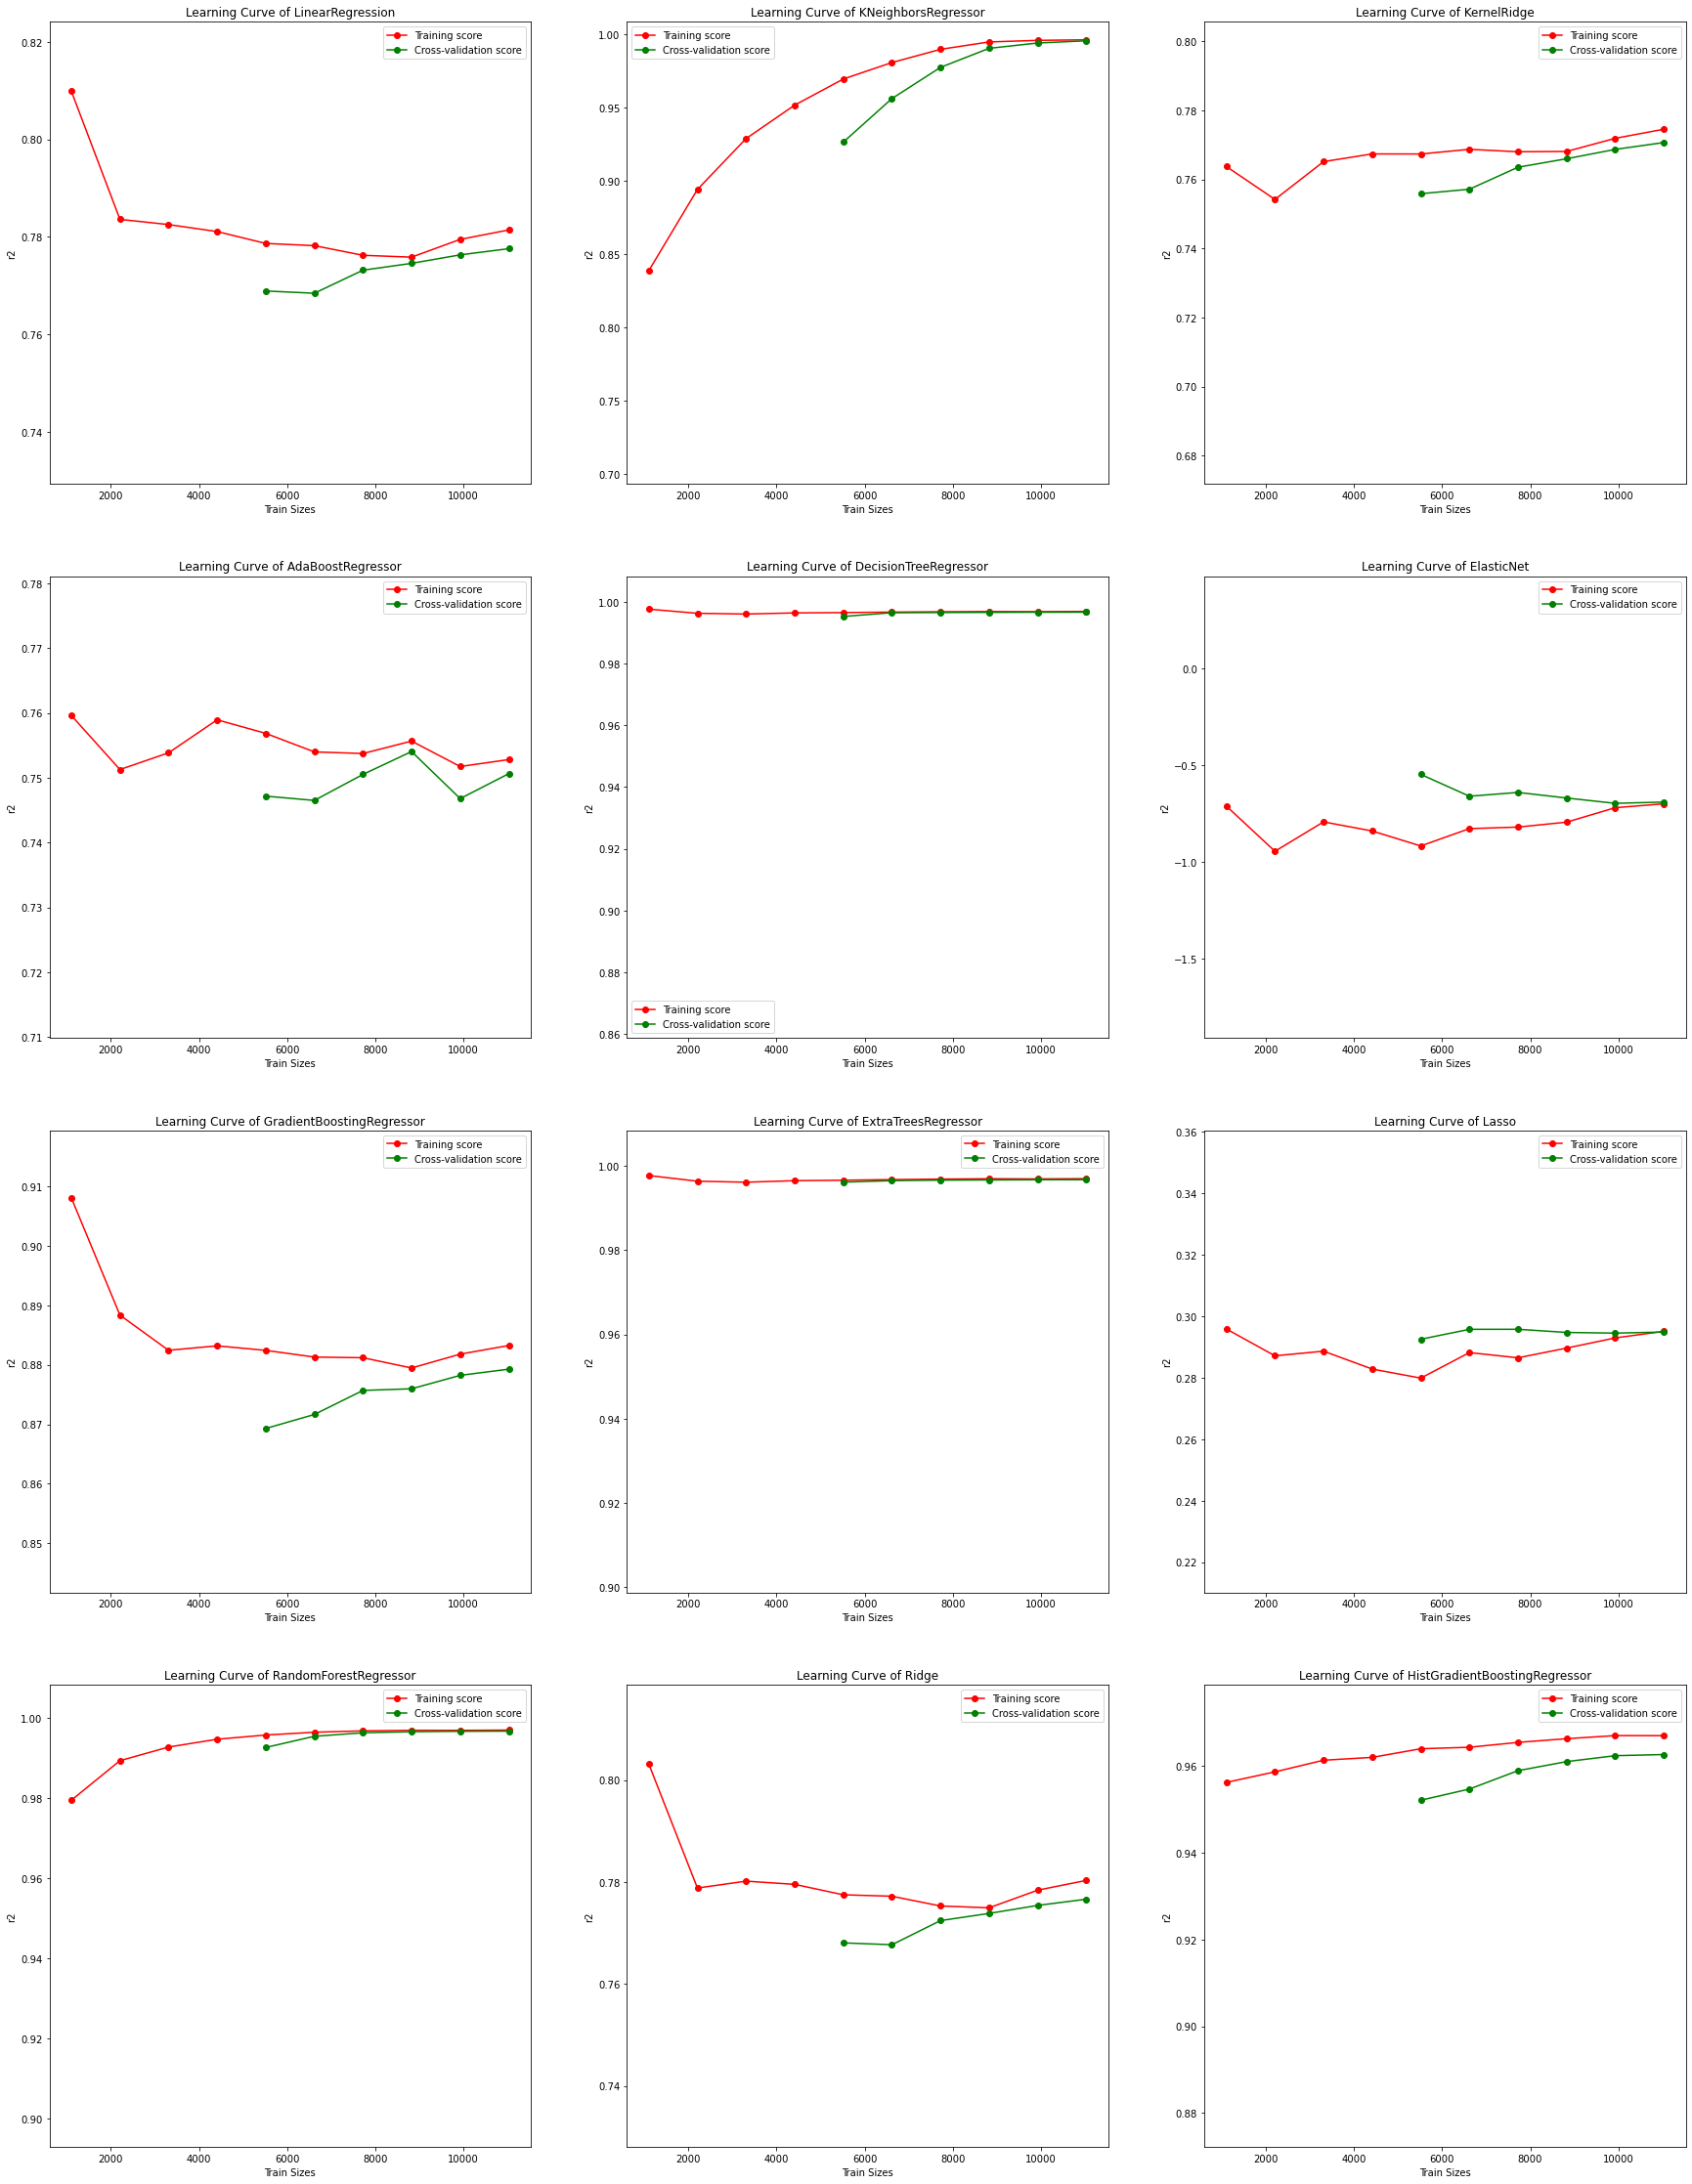

In [40]:
def select_model(X_train, y_train, models, scoring, ax):
    # placeholder
    out = []
    # iterate through models
    for name, model in models:
        # creating temporary pipeline
        steps[-1] = (
            name,
            TransformedTargetRegressor(
                regressor=model, func=np.log1p, inverse_func=np.expm1
            ),
        )
        temp_pipeline = Pipeline(steps=steps)
        if ax is not None:
            plot_learning_curve(
                temp_pipeline,
                X_train,
                y_train,
                scoring="r2",
                cv=10,
                ax=ax[
                    models.index((name, model)) % 4, models.index((name, model)) // 4
                ],
            )
        # cross validate
        score = cross_validate(
            temp_pipeline,
            X_train,
            y_train,
            scoring=scoring,
            n_jobs=3,
            verbose=1,
            cv=10,
            return_train_score=True,
        )
        # get the average score and then store in a Series
        out.append(pd.Series(score, name=name).apply(np.mean))
    return pd.DataFrame(out).sort_values(
        by=[
            "test_r2",
            "test_neg_root_mean_squared_error",
            "test_neg_mean_absolute_error",
            "test_neg_mean_absolute_percentage_error",
            "test_neg_mean_squared_error",
        ],
        ascending=False,
    )


# Since we are comparing 12 models
fig, ax = plt.subplots(4, 3, figsize=(30, 40))

model_scores = select_model(X_train, y_train, models, scoring_methods, ax)
plt.show()


**Observations**

As you can see from the learning curves, the learning curve for Adaboost and Gradient Boosting when more data is fitted to the model, the cross validation score decreases.

The K Nearest Neighbour, RandomForest, ExtraTrees and DecisionTree have good learning curves are when more data is fitted to the model, the cross validation score increases and training scores remains constant. This shows that the model are becoming more generalised


In [41]:
model_scores.style.apply(
    lambda x: ["background-color: red; color: white" if v else "" for v in x == x.min()]
).apply(
    lambda x: [
        "background-color: green; color: white" if v else "" for v in x == x.max()
    ]
)


,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_neg_mean_squared_error,train_neg_mean_squared_error
ExtraTreesRegressor,7.379182,0.051949,0.996691,0.996939,-106.080918,-103.543282,-26.268293,-24.953545,-0.008825,-0.008309,-11470.551685,-10724.553649
DecisionTreeRegressor,0.207192,0.027974,0.996691,0.996939,-106.080918,-103.543282,-26.268293,-24.953545,-0.008825,-0.008309,-11470.551685,-10724.553649
RandomForestRegressor,5.594247,0.056982,0.996688,0.996937,-106.152576,-103.587718,-26.840068,-25.170951,-0.008984,-0.008375,-11480.276963,-10733.529030
KNeighborsRegressor,0.117178,0.522078,0.995559,0.996237,-122.795149,-114.781410,-30.618640,-26.348545,-0.010382,-0.008793,-15437.478432,-13182.594482
HistGradientBoostingRegressor,5.082912,0.065484,0.963047,0.967106,-358.282664,-339.491359,-233.267039,-220.326660,-0.076105,-0.071725,-128495.474775,-115280.374240
GradientBoostingRegressor,8.266682,0.033527,0.879303,0.883081,-648.647766,-640.072379,-437.153796,-431.537958,-0.144106,-0.142466,-421814.630253,-409705.745476
LinearRegression,0.175446,0.029034,0.777559,0.781403,-881.023041,-875.210726,-561.194167,-557.720786,-0.180563,-0.179463,-778953.646177,-766018.937238
Ridge,0.107887,0.023805,0.776612,0.780295,-882.933770,-877.427251,-561.530682,-558.119111,-0.180563,-0.179473,-782403.721813,-769905.282596
KernelRidge,18.777531,0.099570,0.770685,0.774537,-894.635721,-888.851196,-562.447166,-558.950717,-0.180782,-0.179657,-803651.637898,-790085.594773
AdaBoostRegressor,3.866260,0.060781,0.755397,0.755496,-924.103708,-925.621790,-647.945402,-647.987849,-0.227444,-0.227339,-856046.520945,-856847.680951


<u><b>Observations</b></u>

- Some models performs equally well with 0.99 mean cross-validation r2 of 10 folds
- ElasticNet is the worst performing model as it is a hybrid of both Ridge and Lasso. However, all three models are used in Regularization to make models better. Therefore a standalone Ridge, Lasso and ElasticNet will not produce the best model.

<u><b>Selection of model</b></u>

Therefore, we will use the DecisionTreeRegressor. Not only does it have one of the best r2 score. However RMSE is more important than r2 in comparing between models. DecisionTreeRegressor has the lowest RMSE which means it is a suitable model. Furthermore, DecisionTreeRegressor are more explainable than other Tree based models therefore, we will use DecisionTreeRegressor. We will be comparing it with 1 more model. Instead of comparing with other tree specific models, we will be using the HistGradientBoostingRegressor, not only because it is more explainable compared to KNeighborsRegressor, it has a high r2 and low root mean squared error.


# Initialising DecisionTreeRegressor


In [42]:
steps[-1] = (
    "model",
    TransformedTargetRegressor(
        regressor=DecisionTreeRegressor(), func=np.log1p, inverse_func=np.expm1
    ),
)

d_tree_reg = Pipeline(steps=steps)
d_tree_reg.fit(X_train, y_train)
print(f"Model Accuracy Score :{d_tree_reg.score(X_train, y_train)}")
scores = cross_validate(
    d_tree_reg,
    X_train,
    y_train,
    cv=10,
    scoring=scoring_methods,
    n_jobs=4,
    return_train_score=True,
)
# displaying scores
display(
    pd.DataFrame(scores)
    .append(pd.Series(pd.DataFrame(scores).mean(), name="Mean"))
    .style.apply(
        lambda x: [
            "background-color: red; color: white" if v else "" for v in x == x.min()
        ]
    )
    .apply(
        lambda x: [
            "background-color: green; color: white" if v else "" for v in x == x.max()
        ]
    )
)


Model Accuracy Score :0.9969289700740642


,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_neg_mean_squared_error,train_neg_mean_squared_error
0,0.273135,0.029919,0.996749,0.996925,-106.479956,-103.820293,-25.635509,-24.997889,-0.008758,-0.008282,-11337.981121,-10778.653167
1,0.270933,0.026929,0.995066,0.997127,-124.069146,-100.930308,-30.861527,-24.382345,-0.010409,-0.008133,-15393.152935,-10186.927045
2,0.260961,0.028921,0.995402,0.997104,-129.848734,-100.473271,-30.049669,-24.556076,-0.009274,-0.008275,-16860.693690,-10094.878101
3,0.254977,0.029929,0.996756,0.996946,-95.243963,-104.605903,-25.094895,-25.088990,-0.008383,-0.008361,-9071.412507,-10942.394992
4,0.223018,0.024931,0.998213,0.996758,-81.783231,-106.186155,-19.469655,-25.681675,-0.006900,-0.008502,-6688.496834,-11275.499433
5,0.225911,0.024933,0.995767,0.997028,-121.144068,-102.100562,-29.709068,-24.615678,-0.009193,-0.008269,-14675.885227,-10424.524790
6,0.210052,0.027684,0.997453,0.996851,-93.475375,-105.177858,-25.366653,-25.136416,-0.008659,-0.008340,-8737.645730,-11062.381737
7,0.213512,0.027463,0.997647,0.996808,-93.905330,-105.350342,-22.804614,-25.322229,-0.007793,-0.008421,-8818.210933,-11098.694607
8,0.155709,0.020193,0.996590,0.996973,-111.888444,-102.716664,-28.809271,-24.621920,-0.010174,-0.008178,-12519.023789,-10550.713082
9,0.154100,0.023845,0.997266,0.996872,-102.970938,-104.071464,-24.882066,-25.132236,-0.008707,-0.008327,-10603.014083,-10830.869532


<u><b>Observations</b></u>

Throughout the 10 cross folds, the r2 accuracy is over 0.99, this suggest that the model is good at predicting the price of PCs

# Initialising HistGradientBoostingRegressor


In [43]:
steps[-1] = (
    "model",
    TransformedTargetRegressor(
        regressor=HistGradientBoostingRegressor(), func=np.log1p, inverse_func=np.expm1
    ),
)

hgb_reg = Pipeline(steps=steps)
hgb_reg.fit(X_train, y_train)
print(f"Model Accuracy Score :{hgb_reg.score(X_train, y_train)}")
scores = cross_validate(
    hgb_reg,
    X_train,
    y_train,
    cv=10,
    scoring=scoring_methods,
    n_jobs=4,
    return_train_score=True,
)
# displaying scores
display(
    pd.DataFrame(scores)
    .append(pd.Series(pd.DataFrame(scores).mean(), name="Mean"))
    .style.apply(
        lambda x: [
            "background-color: red; color: white" if v else "" for v in x == x.min()
        ]
    )
    .apply(
        lambda x: [
            "background-color: green; color: white" if v else "" for v in x == x.max()
        ]
    )
)


Model Accuracy Score :0.9680665283294771


,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_neg_mean_squared_error,train_neg_mean_squared_error
0,11.987094,0.076904,0.965418,0.966491,-347.296310,-342.729682,-226.168215,-223.544099,-0.075734,-0.072417,-120614.726966,-117463.635003
1,11.959316,0.071918,0.960713,0.969062,-350.088308,-331.228844,-230.791167,-219.251092,-0.078359,-0.072179,-122561.823564,-109712.547234
2,11.976305,0.096028,0.964682,0.968281,-359.875599,-332.490843,-235.479916,-220.262224,-0.075090,-0.072872,-129510.446664,-110550.160698
3,12.078435,0.250116,0.956440,0.967226,-349.010371,-342.654005,-235.877294,-221.497113,-0.078588,-0.072143,-121808.239122,-117411.767143
4,10.971343,0.108806,0.965716,0.967372,-358.209113,-336.861716,-236.019336,-221.526711,-0.076395,-0.072313,-128313.768664,-113475.815554
5,11.000186,0.155965,0.962196,0.966788,-362.021759,-341.338003,-238.559931,-223.242505,-0.076150,-0.073379,-131059.753668,-116511.632558
6,11.140961,0.201980,0.961826,0.965636,-361.904201,-347.428287,-236.677805,-223.730322,-0.075062,-0.071777,-130974.650348,-120706.414677
7,11.680126,0.116942,0.960763,0.966121,-383.455857,-343.235644,-240.294436,-221.495522,-0.076204,-0.072165,-147038.394436,-117810.707295
8,8.060789,0.032911,0.965412,0.967014,-356.361364,-339.094019,-228.513501,-220.144221,-0.075133,-0.071274,-126993.421609,-114984.753777
9,7.875924,0.041888,0.965277,0.966851,-366.947764,-338.797054,-242.927547,-220.889546,-0.078029,-0.072107,-134650.661574,-114783.443648


<u><b>Observations</b></u>

Throughout the 10 cross folds, the r2 accuracy is around 0.96. Compared to DecisionTreeRegressor, HistGradientRegressor is not as good at predicting the price of PCs

## Comparing models with baseline

To compare the Baseline model, HistGradientBoostingRegressor and DecisionTreeRegressor, we will use the following attributes.

1. Prediction Error Plot
2. Learning Curve
3. Residual Plot


In [44]:
def plot_residual_plot(model, X, y, ax=None):
    try:
        model_name = type(model[-1].regressor).__name__
    except:
        try:
            model_name = type(model[-1]).__name__
        except:
            model_name = type(model).__name__
    y_pred = model.predict(X)
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 10))
    residual = y - y_pred
    ax.scatter(range(len(residual)), residual, alpha=0.3)
    ax.set_xlabel("Data Point")
    ax.set_ylabel("Residual")
    ax.set_title(f"Residual Plot using {model_name}")
    return ax


In [45]:
def plot_prediction_error_plot(model, X, y, ax=None):
    try:
        model_name = type(model[-1].regressor).__name__
    except:
        try:
            model_name = type(model[-1]).__name__
        except:
            model_name = type(model).__name__
    y_pred = model.predict(X)
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 10))
    ax.scatter(y, y_pred, c="red", marker="x")
    p1 = max(max(y_pred), max(y_test))
    p2 = min(min(y_pred), min(y_test))
    ax.plot([p1, p2], [p1, p2], "b--", label="Identity")
    a, b = np.polyfit(y, y_pred, 1)
    ax.plot(y, a * y + b, "g-", label="Best Fit")
    ax.legend()
    ax.set_xlabel("True Values")
    ax.set_ylabel("Predictions")
    ax.set_title(f"Prediction Error Plot using {model_name}")
    print(f"{model_name}'s R2: {r2_score(y,y_pred)}")
    return ax



DummyRegressor's R2: -0.0863342545588004
DecisionTreeRegressor's R2: 0.9959352785260022
HistGradientBoostingRegressor's R2: 0.9584546899125752


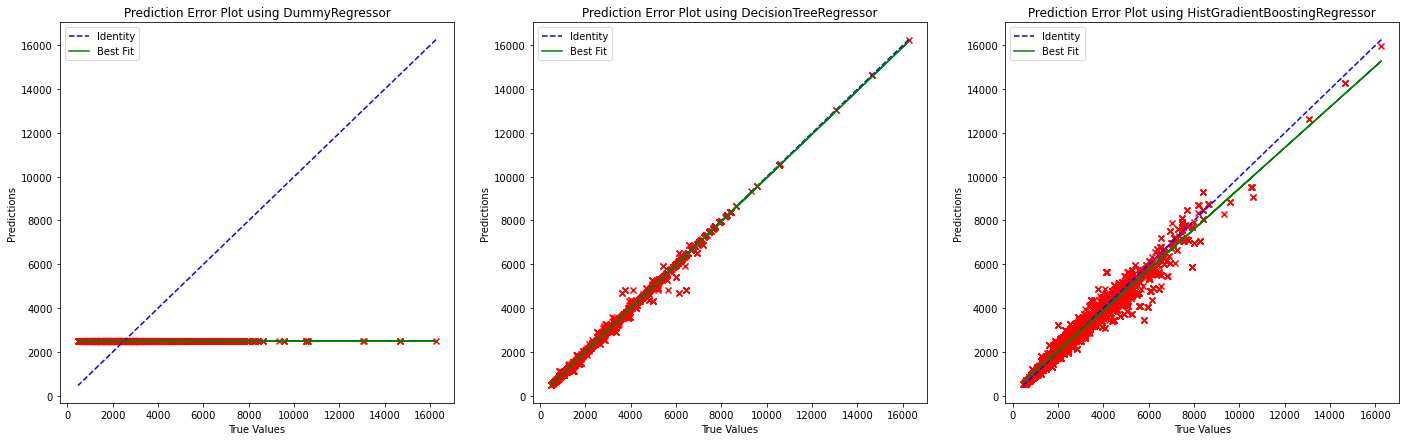

In [46]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 7))
plot_prediction_error_plot(dummy, X_test, y_test, ax1)
plot_prediction_error_plot(d_tree_reg, X_test, y_test, ax2)
plot_prediction_error_plot(hgb_reg, X_test, y_test, ax3)
plt.show()


**Observations**

- We can see that the DecisionTreeRegressor's best fit line is lying on the identity which means the model's prediction closely follow the trend of the Identity.
- We can see that the DummyRegressor's best fit line is so far away, this means the model is not following the trend of the prices.
- We can see that the HistGradientBoostingRegressor still can be improved as the best fit lies slightly to the bottom of the identity line.


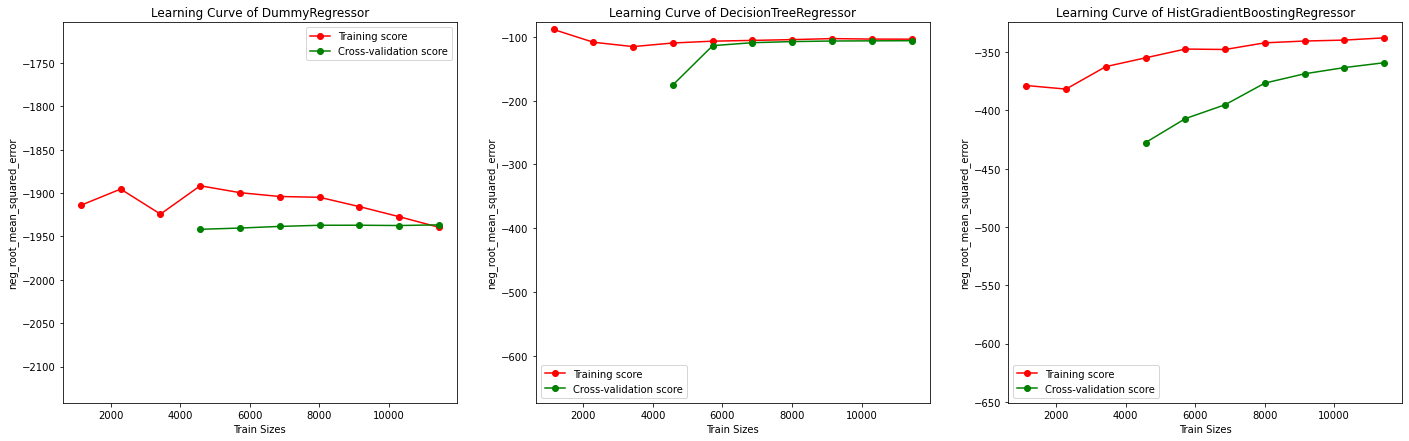

In [47]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 7))
plot_learning_curve(
    dummy, X_train, y_train, scoring="neg_root_mean_squared_error", cv=15, ax=ax1
)
plot_learning_curve(
    d_tree_reg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=15, ax=ax2
)
plot_learning_curve(
    hgb_reg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=15, ax=ax3
)
plt.show()


<u><b>Observations</b></u>

We can see that DecisionTreeRegressor is quite generalised as the variance between the training score and cross validation score is miniscule. For HistGradientBoostingRegressor still have a bit of variance which we can tune later to make it better.

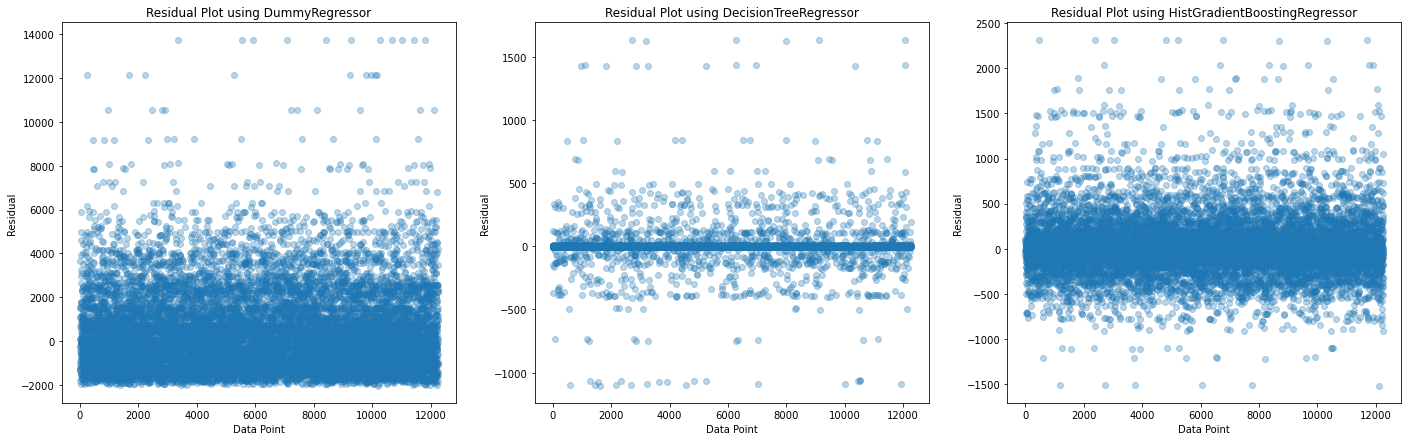

In [48]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 7))
plot_residual_plot(dummy, X_train, y_train, ax=ax1)
plot_residual_plot(d_tree_reg, X_train, y_train, ax=ax2)
plot_residual_plot(hgb_reg, X_train, y_train, ax=ax3)
plt.show()


**Observations**

Many of the Data points of the DecisionTreeRegressor lies on 0 which means it is correctly predicted, compared to the other 2 models, DecisionTreeRegressor fits the model the best


#### Generating predictions

Let's see how the model fair against unseen data


In [49]:
model_list = [
    (
        "DecisionTreeRegressor",
        TransformedTargetRegressor(
            regressor=DecisionTreeRegressor(), func=np.log1p, inverse_func=np.expm1
        ),
    ),
    (
        "HistGradientBoostingRegressor",
        TransformedTargetRegressor(
            regressor=HistGradientBoostingRegressor(),
            func=np.log1p,
            inverse_func=np.expm1,
        ),
    ),
]
model_scores = select_model(X_test, y_test, model_list, scoring_methods, ax=None)
model_scores


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    3.5s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed: 39.2min finished


,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_neg_mean_squared_error,train_neg_mean_squared_error
DecisionTreeRegressor,0.079410,0.021563,0.959094,0.997134,-355.096899,-98.268976,-93.187113,-19.641858,-0.032089,-0.006833,-138419.023322,-9680.141330
HistGradientBoostingRegressor,694.780308,4.931264,0.934253,0.961389,-466.549970,-361.008093,-283.181669,-225.337574,-0.088787,-0.071064,-225945.155504,-130386.967622


**Observations**
Generally DecisionTreeRegressor is better at predicting PC prices but the difference is not very big, there is only around 111 root_mean_squared_error. This means we can continue and tune both models to see which will give a better result

# Model Improvement

Although our models perform very well, there are still some improvements to be made to our models by simplifying them to make them more generalizable. Let's see what are the possible params that can be tuned.


In [50]:
list(DecisionTreeRegressor().get_params().keys())


['ccp_alpha',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'random_state',
 'splitter']

In [51]:
list(HistGradientBoostingRegressor().get_params().keys())


['categorical_features',
 'early_stopping',
 'l2_regularization',
 'learning_rate',
 'loss',
 'max_bins',
 'max_depth',
 'max_iter',
 'max_leaf_nodes',
 'min_samples_leaf',
 'monotonic_cst',
 'n_iter_no_change',
 'quantile',
 'random_state',
 'scoring',
 'tol',
 'validation_fraction',
 'verbose',
 'warm_start']

### Hyperparameter Tuning and Evaluation

We will be using RandomizedSearchCV to run through the parameters to see which model's parameter will give the best r2 score.

Parameters to be tuned (DecisionTreeRegressor):

1. max_depth - maximum depth of the tree, basically how big can the tree grow
2. max_leaf_nodes - stopping criteria for number of leaves

Parameters to be tuned (HistGradientBoostingRegressor):

1. max_depth - maximum depth of the tree, basically how big can the tree grow
2. max_leaf_nodes - stopping criteria for number of leaves


### RandomizedSearchCV

The only difference between both the approaches is in grid search we define the combinations and do training of the model whereas in RandomizedSearchCV the model selects the combinations randomly. This means that generally RandomizedSearchCV will be faster than GridSearchCV. GridSearchCV will find the best values based on scoring metrics by training however, RandomizedSearchCV will choose n_iter (default=10) and compare to see which of the following gives the best metrics


In [52]:
# Create the parameter grid
params_grid = {
    "regressor__max_depth": [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    "regressor__max_leaf_nodes": np.arange(10, 16),
}

# Creating a model based on the pipeline
steps[-1] = (
    "hyper",
    RandomizedSearchCV(
        TransformedTargetRegressor(
            regressor=DecisionTreeRegressor(
                min_samples_split=2, min_samples_leaf=1, random_state=random_state
            ),
            func=np.log1p,
            inverse_func=np.expm1,
        ),
        params_grid,
        cv=15,
        verbose=1,
        n_jobs=-1,
        scoring="r2",
        n_iter=50,
        random_state=22,
    ),
)

d_tree_random_search = Pipeline(steps=steps)
# Fitting Model
d_tree_random_search.fit(X_train, y_train)
print(d_tree_random_search.named_steps["hyper"].best_estimator_)
print(d_tree_random_search.named_steps["hyper"].best_params_)
print(d_tree_random_search.named_steps["hyper"].best_score_)


Fitting 15 folds for each of 50 candidates, totalling 750 fits
TransformedTargetRegressor(func=<ufunc 'log1p'>, inverse_func=<ufunc 'expm1'>,
                           regressor=DecisionTreeRegressor(max_depth=100,
                                                           max_leaf_nodes=15,
                                                           random_state=40))
{'regressor__max_leaf_nodes': 15, 'regressor__max_depth': 100}
0.7252449317481282


In [53]:
# Create the parameter grid
params_grid = {
    "regressor__max_depth": [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    "regressor__max_leaf_nodes": np.arange(10, 16),
}

# Creating a model based on the pipeline
steps[-1] = (
    "hyper",
    RandomizedSearchCV(
        TransformedTargetRegressor(
            regressor=HistGradientBoostingRegressor(
                min_samples_leaf=1, random_state=random_state
            ),
            func=np.log1p,
            inverse_func=np.expm1,
        ),
        params_grid,
        cv=15,
        verbose=1,
        n_jobs=-1,
        scoring="r2",
        n_iter=50,
        random_state=22,
    ),
)

hgb_random_search = Pipeline(steps=steps)
# Fitting Model
hgb_random_search.fit(X_train, y_train)
print(hgb_random_search.named_steps["hyper"].best_estimator_)
print(hgb_random_search.named_steps["hyper"].best_params_)
print(hgb_random_search.named_steps["hyper"].best_score_)


Fitting 15 folds for each of 50 candidates, totalling 750 fits
TransformedTargetRegressor(func=<ufunc 'log1p'>, inverse_func=<ufunc 'expm1'>,
                           regressor=HistGradientBoostingRegressor(max_depth=10,
                                                                   max_leaf_nodes=15,
                                                                   min_samples_leaf=1,
                                                                   random_state=40))
{'regressor__max_leaf_nodes': 15, 'regressor__max_depth': 10}
0.932162236174155


# Model Evaluation

We will evaluate the model on an independent test set to see if the model is able to generalize to
unseen examples


In [54]:
y_test.shape


(3064,)

There are 3064 unseen test examples


### Initiate model after hyperparameter training

After training, we will have the model which will perform the best. Let's see if there is a boost in results after training


In [55]:
steps[-1] = (
    "tuned",
    TransformedTargetRegressor(
        regressor=d_tree_random_search.named_steps["hyper"].best_estimator_.regressor,
        func=np.log1p,
        inverse_func=np.expm1,
    ),
)

tuned_tree_reg = Pipeline(steps)
# Fitting Model
tuned_tree_reg.fit(X_train, y_train)
# Creating predictions
tree_y_pred = tuned_tree_reg.predict(X_test)


In [56]:
steps[-1] = (
    "tuned",
    TransformedTargetRegressor(
        regressor=hgb_random_search.named_steps["hyper"].best_estimator_.regressor,
        func=np.log1p,
        inverse_func=np.expm1,
    ),
)

tuned_hgb_reg = Pipeline(steps)
# Fitting Model
tuned_hgb_reg.fit(X_train, y_train)
# Creating predictions
hgb_y_pred = tuned_hgb_reg.predict(X_test)


#### Comparing DecisionTreeRegressor and HistGradientBoostingRegressor


Pre Tuned Models
DecisionTreeRegressor's R2: 0.9959352785260022
HistGradientBoostingRegressor's R2: 0.9584546899125752

Tuned Models
DecisionTreeRegressor's R2: 0.7011782848859582
HistGradientBoostingRegressor's R2: 0.9229003008253718


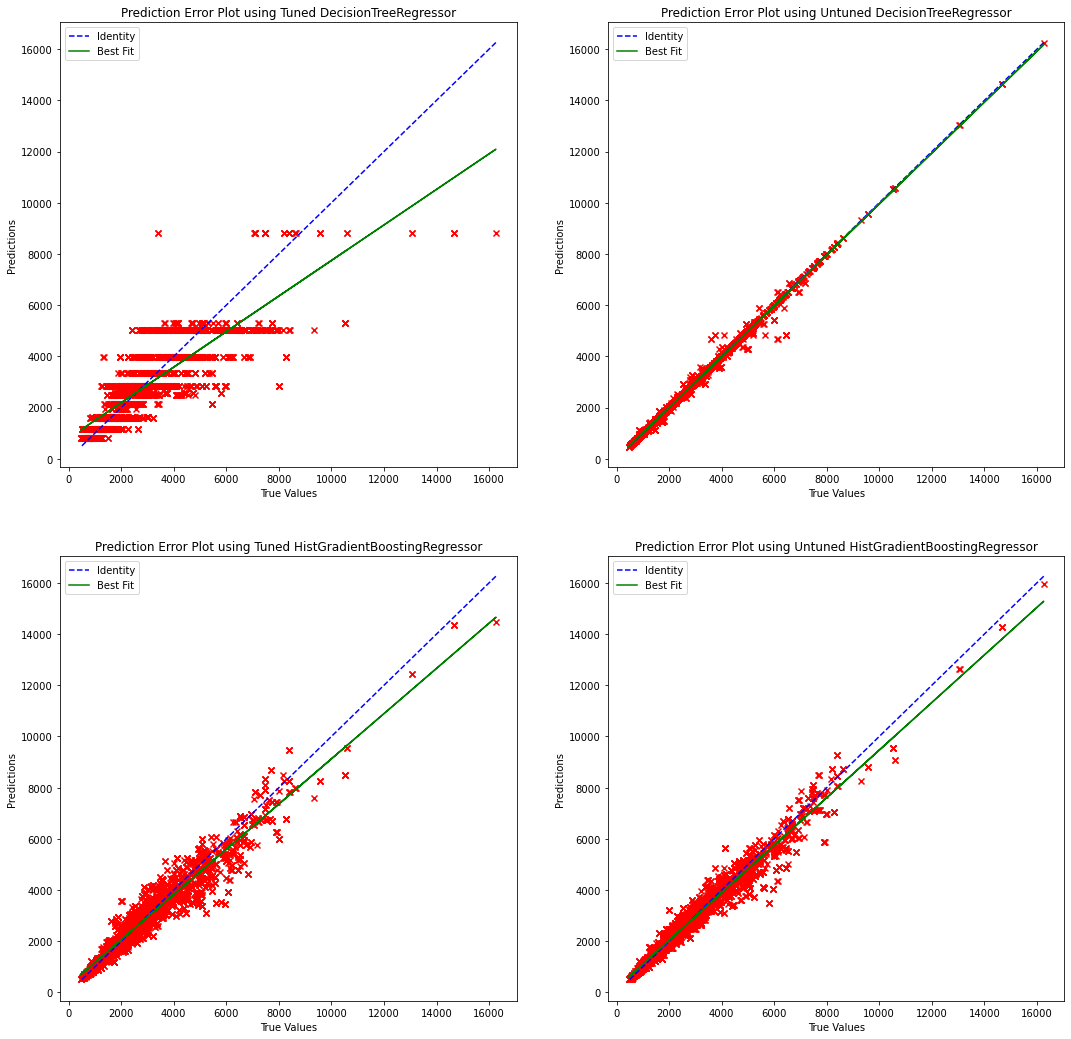

In [57]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 18))
print("Pre Tuned Models")
plot_prediction_error_plot(d_tree_reg, X_test, y_test, ax=ax2)
plot_prediction_error_plot(hgb_reg, X_test, y_test, ax=ax4)
print("\nTuned Models")
plot_prediction_error_plot(tuned_tree_reg, X_test, y_test, ax=ax1)
plot_prediction_error_plot(tuned_hgb_reg, X_test, y_test, ax=ax3)

ax1.set_title("Prediction Error Plot using Tuned DecisionTreeRegressor")
ax2.set_title("Prediction Error Plot using Untuned DecisionTreeRegressor")
ax3.set_title("Prediction Error Plot using Tuned HistGradientBoostingRegressor")
ax4.set_title("Prediction Error Plot using Untuned HistGradientBoostingRegressor")
plt.show()


**Observations**

We see that after tunning, DecisionTreeRegressor becomes a lot worst compared to HistGradientBoostingRegressor. This is because of the max depth parameter which was tunned which makes DecisionTreeRegressor more unlikely to overfit. Therefore, we can conclude that the untuned DecisionTreeRegressor might have overfitted to the data.

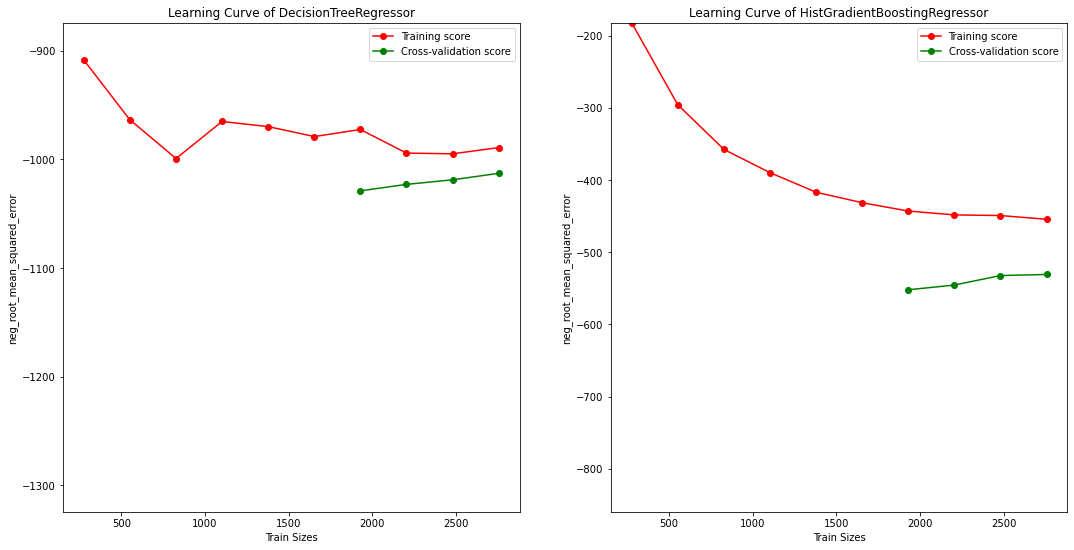

In [58]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))
plot_learning_curve(
    tuned_tree_reg, X_test, y_test, scoring="neg_root_mean_squared_error", cv=10, ax=ax1
)
plot_learning_curve(
    tuned_hgb_reg, X_test, y_test, scoring="neg_root_mean_squared_error", cv=10, ax=ax2
)
plt.show()


**Observations**

Even though DecisionTreeRegressor’s variance might look smaller, but based on the scaling, HistGradientBoostingRegressor has a smaller variance. The neg_root_mean_squared_error of HistGradientBoostingRegressor is smaller which makes it a better model.


orange: pre tuned model
blue: tuned model


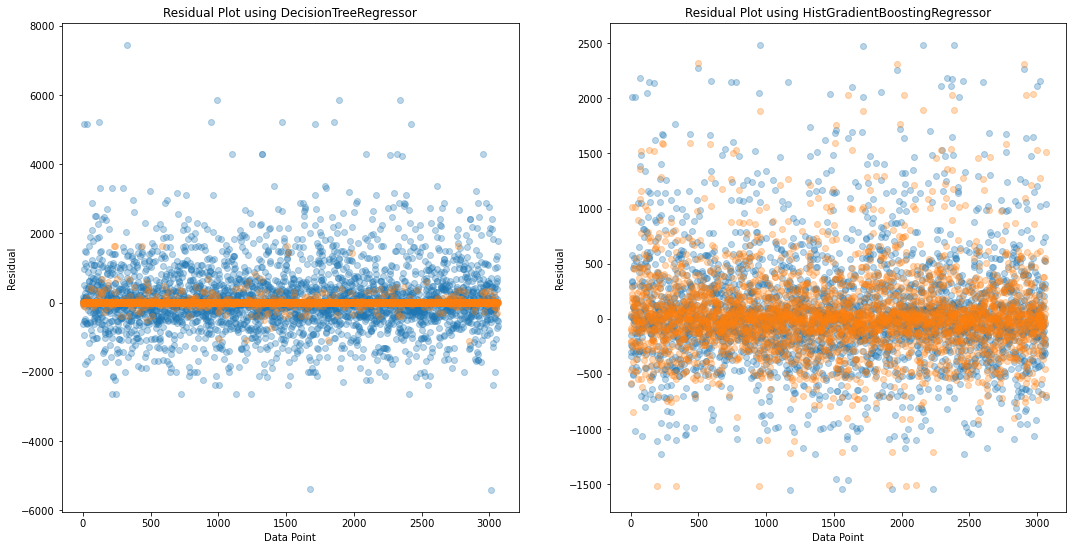

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))
plot_residual_plot(tuned_tree_reg, X_test, y_test, ax=ax1)
plot_residual_plot(d_tree_reg, X_test, y_test, ax=ax1)
plot_residual_plot(tuned_hgb_reg, X_test, y_test, ax=ax2)
plot_residual_plot(hgb_reg, X_test, y_test, ax=ax2)
print("orange: pre tuned model")
print("blue: tuned model")
plt.show()


In [60]:
pd.DataFrame(
    [
        [
            mean_squared_error(y_test, tree_y_pred),
            mean_squared_error(y_test, hgb_y_pred),
        ],
        [r2_score(y_test, tree_y_pred), r2_score(y_test, hgb_y_pred)],
    ],
    columns=["DecisionTreeRegressor", "HistGradientBoostingRegressor"],
    index=["Mean Squared Error", "R2"],
)



,DecisionTreeRegressor,HistGradientBoostingRegressor
Mean Squared Error,1.009397e+06,260436.91201
R2,7.011783e-01,0.92290


<u><b>Observations</b></u>

We note that after tunning the model, the DecisionTreeRegressor becomes less reliable as we have fixed the max depth of the DecisionTree. This means that the DecisionTree cannot overfit and correctly predict the prices of PCs as accurately. In comparison, HistGradientBoostingRegressor although there is a slight drop in score, it is generally more accurate and means that HistGradientBoostingRegressor is the better model compared to DecisionTreeRegressor.


### Features Importance


In [61]:
r = permutation_importance(
    tuned_hgb_reg, X_train, y_train, n_repeats=30, random_state=0
)



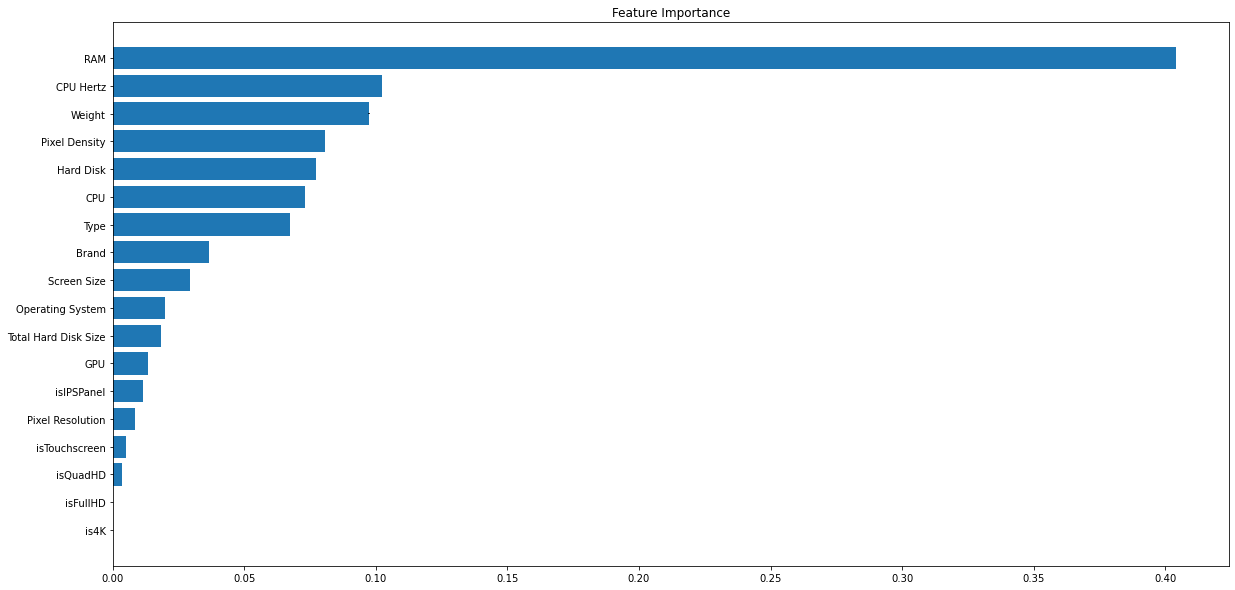

In [62]:
plt.subplots(1, 1, figsize=(20, 10))
indices = r.importances_mean.argsort()[::1]
plt.barh(
    range(X_train.shape[1]),
    r.importances_mean[indices],
    yerr=r.importances_std[indices],
)
plt.yticks(range(X_train.shape[1]), X_train.columns[indices])
plt.title("Feature Importance")
plt.show()


<u><b>Observations</b></u>

We can see that RAM and CPU Hertz are one of the more important feature of the model. Generally, when we think about PCs, the more the RAM, the more expensive the PCs is. CPU Hertz and Pixel Density is one of the featured engineered values which is quite important which makes our feature engineering good.


# Saving models


In [63]:
pickle.dump(tuned_hgb_reg, open("HistGradientBoostingRegressor.p", "wb"))
tuned_hgb_reg = pickle.load(open("HistGradientBoostingRegressor.p", "rb"))


# Summary

We have successfully created a model that is able to predict the price of the PCs. Through extensive feature engineering, we have develop a simple model that is able to predict the price of the PCs. However, the model still faces some limitations. It has only been trained and tested on older model of PCs, as technology advances, more new and expensive PCs will be created and might affect factors like weight and cpu. For the model to be fully deployed, it is necessary to collect more data and test it on real life examples through the use of web scrapping etc.

<hr>

# Personal Learning Reflection

The difficulty I found doing the prediction task was being able to find information about the model I was using. HistGradientBoostingRegressor has only been released in v0.21 and was previously in experimental development. Certain functions like .feature*importances* are not implement yet which means feature selections etc are quite hard to find documentations for.
